# Homework #7
Name: Gunhoo Park  
USC ID: 8585425433  
Github username: gunhoo

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, hamming_loss, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

## (a) Download the Anuran Calls (MFCCs) Data Set from https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs. Choose 70% of the data randomly as the training set.

In [5]:
FILE_PATH = '../data/Anuran_Calls_MFCCs/Frogs_MFCCs.csv'
df = pd.read_csv(FILE_PATH)
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [6]:
x_train_df, x_test_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=42)

In [7]:
x_train_df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,17
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407,Dendrobatidae,Ameerega,Ameeregatrivittata,13
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221,Hylidae,Hypsiboas,HypsiboasCinerascens,37
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006,Leptodactylidae,Adenomera,AdenomeraAndre,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656,Hylidae,Hypsiboas,HypsiboasCinerascens,37


In [8]:
x_test_df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
3340,1.0,0.147506,0.014843,0.433466,0.169581,0.053135,-0.152020,-0.102427,0.153061,0.128628,...,0.285756,0.166246,-0.061206,-0.191878,0.003221,0.255371,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,21
5108,1.0,0.674174,0.767520,0.392177,0.035669,0.181548,-0.013677,0.187262,0.144679,-0.424524,...,-0.157943,-0.048913,-0.016129,0.129200,0.011245,-0.275909,Hylidae,Hypsiboas,HypsiboasCinerascens,36
6524,1.0,-0.007777,0.363276,0.413224,0.196296,0.222389,0.097128,-0.155608,-0.035013,0.133689,...,0.125169,0.044882,-0.013309,-0.026086,-0.088825,-0.018968,Hylidae,Hypsiboas,HypsiboasCordobae,43
3649,1.0,0.429359,0.297881,0.609120,0.263991,-0.030414,-0.160778,0.076217,0.285909,0.052029,...,0.230330,0.069015,-0.101196,-0.152351,0.039065,0.233823,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
1617,1.0,0.190599,0.062234,0.617262,0.208825,0.027108,-0.214441,0.009654,0.299053,0.039013,...,0.321598,0.128742,-0.152977,-0.223482,0.016131,0.250754,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1.0,0.469993,0.342252,0.508362,0.184239,0.138370,-0.070231,0.034221,0.226367,-0.001120,...,0.186595,-0.080672,-0.104266,-0.077342,0.159712,0.239398,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,14
142,1.0,0.162558,-0.115829,0.045608,0.226107,0.325952,0.157953,-0.124050,-0.009148,0.235613,...,-0.120102,-0.226043,-0.161989,0.037390,0.185305,0.059824,Leptodactylidae,Adenomera,AdenomeraAndre,4
1490,1.0,0.160219,0.137078,0.599525,0.252240,0.077200,-0.132288,-0.001605,0.244840,0.081377,...,0.275059,0.046851,-0.108847,-0.190397,-0.011276,0.217408,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
2574,1.0,0.523548,0.387887,0.539775,0.087532,0.028962,-0.025403,0.064718,0.215919,-0.005312,...,0.120708,-0.133983,-0.092651,0.011379,0.109798,0.100649,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,19


## (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

### i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

Exact Match: The sum of all of the individual exact match scores in the set, divided by the total number of predictions in the set.  
Hamming Score: Accuracy = (True Negative + True Positive) / (True Positive + False Positive + True Negative + False Negative)  
  
Reference:  
[1] https://wiki.cloudfactory.com/docs/mp-wiki/metrics/hamming-score  
[2] https://oecd.ai/en/catalogue/metrics/exact-match  

### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [13]:
x_train, y_train = x_train_df.iloc[:, :-4], x_train_df.iloc[:, -4:-1]
x_test, y_test = x_test_df.iloc[:, :-4],  x_test_df.iloc[:, -4:-1]

In [14]:
def compute_hamming_loss(ground_truth, predictions):
    hamming_loss = sum(sum(ground_truth.values != predictions.values)) / (ground_truth.shape[0] * ground_truth.shape[1])
    return round(hamming_loss, 4)

In [15]:
def compute_exact_match_ratio(ground_truth, predictions):
    exact_ratio = (ground_truth == predictions).all(axis=1).mean()
    return round(exact_ratio, 4)

In [16]:
def compute_metrics(ground_truth, predictions):
    hamming_loss = compute_hamming_loss(ground_truth, predictions)
    match_ratio = compute_exact_match_ratio(ground_truth, predictions)
    return hamming_loss, match_ratio

In [17]:
def evaluate_classifier(features, labels, classifiers):
    df_labels = pd.DataFrame(columns=labels.columns)
    for l in labels.columns:
        c = classifiers[l]
        pred = c.predict(features)
        df_labels[l] = pred
    
    return compute_metrics(labels, df_labels)

In [18]:
def optimize_model(classifier, param_grid, train_x, train_y, test_x, test_y, y):
    grid_search = GridSearchCV(estimator=classifier, **param_grid, n_jobs=-1)
    grid_search.fit(train_x, train_y)
    
    print(f'\nBest parameters in {y}:')
    print(grid_search.best_params_, "\n")
    print(classification_report(test_y, grid_search.predict(test_x)))
    return grid_search

In [19]:
kwargs = {
    'scoring': 'f1_weighted',
    'param_grid': {
        'C': np.logspace(1, 4, 4), 
        'gamma': np.logspace(-3, 6, 10)
    }, 
    'cv': StratifiedKFold(10, random_state=42, shuffle=True)
}

In [20]:
results = {}

In [21]:
print('Guassian non-standardized')
gaussian_non_standard = {}
for y in y_train.columns:
    gaussian_non_standard[y] = optimize_model(SVC(kernel='rbf'), kwargs, x_train, y_train[y], x_test, y_test[y], y)

Guassian non-standardized

Best parameters in Family:
{'C': 100.0, 'gamma': 1.0} 

                 precision    recall  f1-score   support

      Bufonidae       0.93      0.93      0.93        27
  Dendrobatidae       1.00      1.00      1.00       162
        Hylidae       0.99      0.99      0.99       623
Leptodactylidae       1.00      0.99      1.00      1347

       accuracy                           0.99      2159
      macro avg       0.98      0.98      0.98      2159
   weighted avg       0.99      0.99      0.99      2159


Best parameters in Genus:
{'C': 100.0, 'gamma': 1.0} 

               precision    recall  f1-score   support

    Adenomera       1.00      1.00      1.00      1251
     Ameerega       0.99      1.00      1.00       162
Dendropsophus       1.00      0.98      0.99        84
    Hypsiboas       0.98      1.00      0.99       468
Leptodactylus       1.00      0.97      0.98        96
Osteocephalus       0.91      0.88      0.90        34
     Rhinella   

In [31]:
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
results['Gaussian non-standardized'] = evaluate_classifier(x_test, y_test, gaussian_non_standard)
print(f'(Hamming loss, exact ratio) of Gaussian non-standardized is {results['Gaussian non-standardized']}')

(Hamming loss, exact ratio) of Gaussian non-standardized is (0.0083, 0.9861)


In [32]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [33]:
print('Guassian standardized')
gaussian_standard = {}
for y in y_train.columns:
    gaussian_standard[y] = optimize_model(SVC(kernel='rbf'), kwargs, scaled_x_train, y_train[y], scaled_x_test, y_test[y], y)

Guassian standardized

Best parameters in Family:
{'C': 1000.0, 'gamma': 0.01} 

                 precision    recall  f1-score   support

      Bufonidae       0.86      0.89      0.87        27
  Dendrobatidae       0.99      1.00      1.00       162
        Hylidae       0.98      0.99      0.99       623
Leptodactylidae       1.00      0.99      0.99      1347

       accuracy                           0.99      2159
      macro avg       0.96      0.97      0.96      2159
   weighted avg       0.99      0.99      0.99      2159


Best parameters in Genus:
{'C': 10.0, 'gamma': 0.01} 

               precision    recall  f1-score   support

    Adenomera       0.99      0.99      0.99      1251
     Ameerega       0.99      1.00      0.99       162
Dendropsophus       0.96      0.93      0.95        84
    Hypsiboas       0.96      1.00      0.98       468
Leptodactylus       0.99      0.93      0.96        96
Osteocephalus       0.97      0.82      0.89        34
     Rhinella     

In [34]:
results['Gaussian standardized'] = evaluate_classifier(scaled_x_test, y_test, gaussian_standard)
print(f'(Hamming loss, exact ratio) of Gaussian non-standardized is {results['Gaussian standardized']}')

(Hamming loss, exact ratio) of Gaussian non-standardized is (0.0124, 0.9787)


### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [36]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

In [37]:
# Source: https://scikit-learn.org/dev/modules/generated/sklearn.svm.LinearSVC.html
kwargs = {
    'scoring': 'f1_weighted',
    'param_grid': {
        'C': np.logspace(1, 5, 10)
    }, 
    'cv': StratifiedKFold(10, random_state=42, shuffle=True)
}

print('L1-penalized SVM')
l1_svm = {}
for y in y_train.columns:
    l1_svm[y] = optimize_model(LinearSVC(penalty='l1', dual=False, multi_class='ovr', max_iter=5000), kwargs, scaled_x_train, y_train[y], scaled_x_test, y_test[y], y)

L1-penalized SVM

Best parameters in Family:
{'C': 10.0} 

                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        27
  Dendrobatidae       0.86      0.88      0.87       162
        Hylidae       0.88      0.91      0.89       623
Leptodactylidae       0.96      0.96      0.96      1347

       accuracy                           0.93      2159
      macro avg       0.67      0.69      0.68      2159
   weighted avg       0.92      0.93      0.92      2159


Best parameters in Genus:
{'C': 1668.100537200059} 

               precision    recall  f1-score   support

    Adenomera       0.96      0.98      0.97      1251
     Ameerega       0.90      0.93      0.91       162
Dendropsophus       0.89      0.70      0.79        84
    Hypsiboas       0.90      0.97      0.93       468
Leptodactylus       0.99      0.89      0.93        96
Osteocephalus       0.94      0.44      0.60        34
     Rhinella       1.00      0.22      0.

In [38]:
results['L1-penalized SVM'] = evaluate_classifier(scaled_x_test, y_test, l1_svm)
print(f'(Hamming loss, exact ratio) of L1-penalized SVM is {results['L1-penalized SVM']}')

(Hamming loss, exact ratio) of L1-penalized SVM is (0.0587, 0.9092)


### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [40]:
def find_optimal_model_SMOTE(classifier, kwargs, x_train, y_train, x_test, y_test, y):
    grid_search = GridSearchCV(estimator=classifier, **kwargs, n_jobs=-1)
    # label_encoder = LabelEncoder()
    # y_encoded = label_encoder.fit_transform(y_train)
    # weights = compute_sample_weight(class_weight='balanced', y=y_encoded)
    # grid_search.fit(x_train, y_train, sample_weight=weights)
    grid_search.fit(x_train, y_train)

    print(f'\nBest parameters in {y}:')
    print(grid_search.best_params_, "\n")
    print(classification_report(y_test, grid_search.predict(x_test)))
    return grid_search

def find_SMOTE(classifier, kwargs, x_train, y_train, x_test, y_test, y):
    pipeline = Pipeline([
        ('sampling', SMOTE()),
        ('classification', classifier)
    ])
    model = find_optimal_model_SMOTE(pipeline, kwargs, x_train, y_train, x_test, y_test, y)
    return model

In [41]:
kwargs = {
    'scoring' : 'f1_weighted', 
    'param_grid' : {'classification__C' : np.logspace(1, 5, 10)}, 
    'cv' : StratifiedKFold(10, random_state = 42, shuffle = True),
}
svm_smote = {}
print('L1-penalized SVM using SMOTE')
for y in y_train.columns:
    svm_smote[y] = find_SMOTE(LinearSVC(penalty='l1', dual=False, multi_class='ovr', max_iter=5000), kwargs, scaled_x_train, y_train[y], scaled_x_test, y_test[y], y)

L1-penalized SVM using SMOTE

Best parameters in Family:
{'classification__C': 1668.100537200059} 

                 precision    recall  f1-score   support

      Bufonidae       0.37      0.89      0.52        27
  Dendrobatidae       0.75      0.98      0.84       162
        Hylidae       0.90      0.88      0.89       623
Leptodactylidae       0.97      0.92      0.94      1347

       accuracy                           0.91      2159
      macro avg       0.75      0.91      0.80      2159
   weighted avg       0.93      0.91      0.91      2159



C:\Users\gunho\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Best parameters in Genus:
{'classification__C': 77.4263682681127} 

               precision    recall  f1-score   support

    Adenomera       0.98      0.90      0.94      1251
     Ameerega       0.83      0.95      0.89       162
Dendropsophus       0.62      0.89      0.73        84
    Hypsiboas       0.94      0.93      0.94       468
Leptodactylus       0.99      0.89      0.93        96
Osteocephalus       0.56      0.85      0.67        34
     Rhinella       0.44      0.89      0.59        27
       Scinax       0.73      0.97      0.84        37

     accuracy                           0.91      2159
    macro avg       0.76      0.91      0.82      2159
 weighted avg       0.93      0.91      0.92      2159


Best parameters in Species:
{'classification__C': 10.0} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.98      0.88      0.93       220
AdenomeraHylaedactylus       1.00      1.00      1.00      1031
    Ameeregatriv

In [42]:
results['SVM using SMOTE'] = evaluate_classifier(scaled_x_test, y_test, svm_smote)
print(f'(Hamming loss, exact ratio) of SVM using SMOTE is {results['SVM using SMOTE']}')

(Hamming loss, exact ratio) of SVM using SMOTE is (0.0733, 0.8648)


In [43]:
results_df = pd.DataFrame(data = results)
results_df.index = ['Hamming Loss', 'Exact Match']
results_df

,Gaussian non-standardized,Gaussian standardized,L1-penalized SVM,SVM using SMOTE
Hamming Loss,0.0083,0.0124,0.0587,0.0733
Exact Match,0.9861,0.9787,0.9092,0.8648


Conclusion:  
- Gaussian non-standardized method is the best in both Hamming Loss and Exact Match

# 2. K-Means Clustering on a Multi-class and Multi-Label Data Set

Monte-Carlo Simulation: Perform the following procedures 50 tiems, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k∈ {1,2, . . . ,50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

(b) In each cluster, determine which family is the majority by reading the true labels. 
Repeat for genus and species.

(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [53]:
def find_optimal_cluster_count(data, max_clusters=50, random_state=42, method='silhouette'):
    best_cluster_count, best_silhouette_score = 2, -1
    
    for cluster_count in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=cluster_count, random_state=random_state)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        
        if silhouette_avg > best_silhouette_score:
            best_cluster_count, best_silhouette_score = cluster_count, silhouette_avg

    return best_cluster_count

def get_cluster_majorities(cluster_count, cluster_labels, true_labels):
    cluster_majorities = pd.DataFrame(columns=['Majority_Family', 'Majority_Genus', 'Majority_Species'])
    
    for cluster_id in range(cluster_count):
        cluster_indices = np.where(cluster_labels == cluster_id)[0]
        cluster_samples = true_labels.iloc[cluster_indices]
        
        majority_family = cluster_samples['Family'].mode()[0]
        majority_genus = cluster_samples['Genus'].mode()[0]
        majority_species = cluster_samples['Species'].mode()[0]
        
        cluster_majorities.loc[cluster_id] = [majority_family, majority_genus, majority_species]

    return cluster_majorities

def compute_hamming_metrics(true_labels, cluster_majorities, cluster_labels):
    hamming_distances, hamming_scores, hamming_losses = [], [], []
    
    for cluster_id in range(len(cluster_majorities)):
        cluster_majority = cluster_majorities.iloc[cluster_id].values
        cluster_indices = np.where(cluster_labels == cluster_id)[0]
        cluster_samples = true_labels.iloc[cluster_indices]
        
        mismatches = (cluster_samples != cluster_majority).values
        hamming_distances.append(np.sum(mismatches) / len(cluster_samples))
        
        hamming_loss = np.mean(mismatches)
        hamming_losses.append(hamming_loss)
        hamming_scores.append(1 - hamming_loss)
    
    return {
        'Hamming_Distance': np.mean(hamming_distances),
        'Hamming_Score': np.mean(hamming_scores),
        'Hamming_Loss': np.mean(hamming_losses)
    }

def run_simulations(data, true_labels, num_simulations=50, max_clusters=50):
    hamming_distances, hamming_losses, hamming_scores = [], [], []
    
    for _ in range(num_simulations):
        optimal_k = find_optimal_cluster_count(data, max_clusters=max_clusters)
        clusterer = KMeans(n_clusters=optimal_k, random_state=42)
        cluster_labels = clusterer.fit_predict(data)
        
        cluster_majorities = get_cluster_majorities(optimal_k, cluster_labels, true_labels)
        hamming_metrics = compute_hamming_metrics(true_labels, cluster_majorities, cluster_labels)
        
        print(f"Simulation {_ + 1}: Optimal k = {optimal_k}")
        display(cluster_majorities)
        
        hamming_distances.append(hamming_metrics['Hamming_Distance'])
        hamming_losses.append(hamming_metrics['Hamming_Loss'])
        hamming_scores.append(hamming_metrics['Hamming_Score'])
    
    return {
        'Average_Hamming_Distance': np.mean(hamming_distances),
        'Average_Hamming_Loss': np.mean(hamming_losses),
        'Average_Hamming_Score': np.mean(hamming_scores),
        'Std_Hamming_Distance': np.std(hamming_distances),
        'Std_Hamming_Loss': np.std(hamming_losses),
        'Std_Hamming_Score': np.std(hamming_scores)
    }

In [55]:
data = df.iloc[:, :-4]
true_labels = df[['Family', 'Genus', 'Species']]

results = run_simulations(data, true_labels)
for metric, value in results.items():
    print(f"{metric}: {value}")

Simulation 1: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 2: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 3: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 4: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 5: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 6: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 7: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 8: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 9: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 10: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 11: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 12: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 13: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 14: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 15: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 16: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 17: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 18: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 19: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 20: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 21: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 22: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 23: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 24: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 25: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 26: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 27: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 28: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 29: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 30: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 31: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 32: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 33: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 34: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 35: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 36: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 37: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 38: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 39: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 40: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 41: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 42: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 43: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 44: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 45: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 46: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 47: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 48: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 49: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Simulation 50: Optimal k = 4


,Majority_Family,Majority_Genus,Majority_Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Average_Hamming_Distance: 0.8463224851872265
Average_Hamming_Loss: 0.2821074950624088
Average_Hamming_Score: 0.7178925049375909
Std_Hamming_Distance: 1.1102230246251565e-16
Std_Hamming_Loss: 5.551115123125783e-17
Std_Hamming_Score: 2.220446049250313e-16


# 3. ISLR 12.6.2 

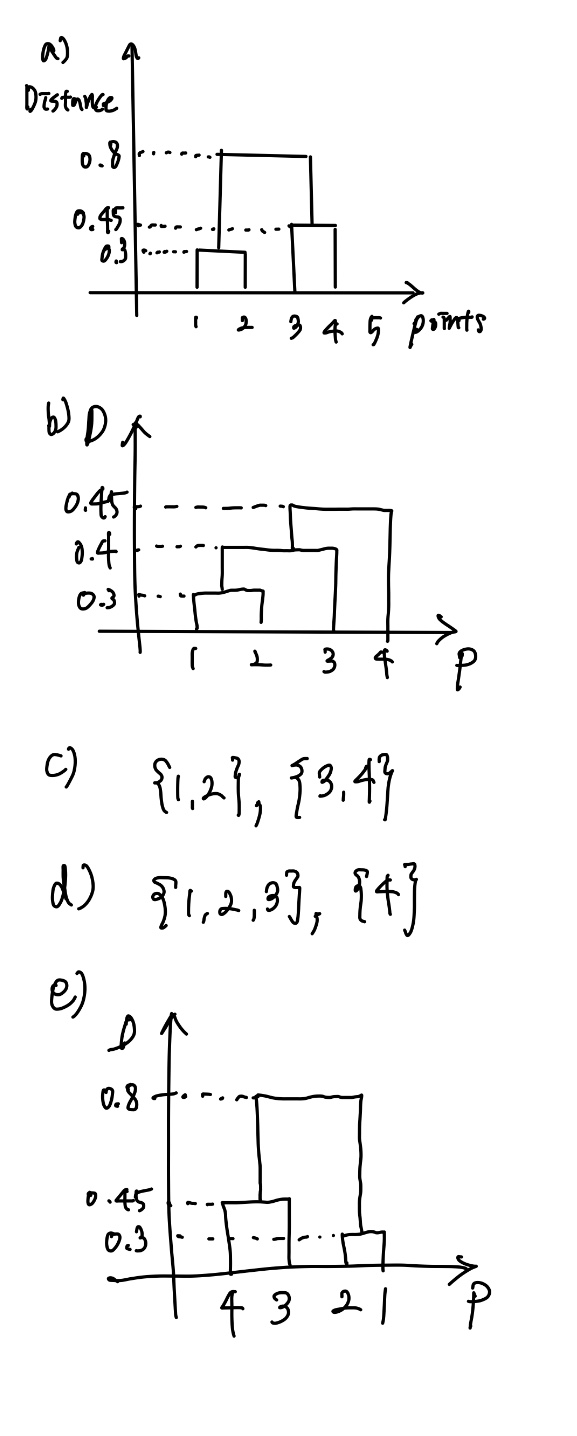